# Homework Set 3

In [20]:
%pylab inline
import pandas as pd
import numpy as np

import fmt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#### Unless explicitly forbidden, you can use any python functions from numpy/scipy to solve homework problems.

## Problem 1
$\renewcommand{bs}{\boldsymbol}$

We discussed three different ways of solving the least square problem of $\min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ in the lecture: 1) the pseudo-inverse $X^+$ 2) QR decomposition 3) SVD. 

1. if $X$ is not fully ranked, i.e., its column vectors are linearly dependent, do the three methods still work?
2. if not, can you propose an modifications to the QR method, so that you can find the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$ even when $X$ is rank deficient? Note that $\bs \beta$ is not unique when $X$ is not fully ranked, but there is still a deterministic answer to the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$. 
3. what is an easy and effective method to find a $\bs \beta$ that is good enough when $A$ is not fully ranked in practice?

Hint:
- It is also possible to make SVD work with rank deficient matrix. Please refer to http://www.cs.cornell.edu/Courses/cs3220/2010sp/notes/svd.pdf if you are interested.

###Answer 1
1. 1) the pseudo-inverse $X^+$
$$\bs \beta = (X^TX)^{-1}X^T\bs y$$
If $X_{n \times m}$(n>m) is not fully ranked, there exits non-zero vector $\bs v_{m}$, so that $X \bs v = 0$. Then $X^TX \bs v = 0$. $X^TX$ can not be invertable. Therefore, the pseudo-inverse method does not work.
$$$$
2) the QR decomposition of $X = QR$:
$$ \min_{\bs {\beta}} \Vert X \bs{\beta - y} \Vert_2 = \min_{\bs {\beta}} \Vert Q^T X \bs \beta - Q^T \bs y \Vert_2 = \min_{\bs {\beta}} \Vert R \bs \beta - \bs y'\Vert_2$$
If $X$ is not fully ranked, R have more 0 rows and is not invertable. Thus there will be many possible $\bs \beta$ that minimize the L-2 norm. The QR decomposition does not work.
$$$$
3) SVD: $X = U\Sigma V^T$, the SVD of $X$'s pseudo inverse is:
$$X^+ = (X^TX)^{-1}X^T = V \Sigma^+ U^T$$
As the singular value $\Sigma$ has the same rank of the origin matrix $X$ and $X$ is not fully ranked, $\Sigma$ and $\Sigma^T \Sigma$ is not invertable. ($\Sigma^+ = (\Sigma^T \Sigma)^{-1}\Sigma^T$) The SVD does not work.
2. $$ \min_{\bs {\beta}} \Vert X \bs{\beta - y} \Vert_2 = \min_{\bs {\beta}} \Vert Q^T X \bs \beta - Q^T \bs y \Vert_2 = \min_{\bs {\beta}} \Vert R \bs \beta - \bs y'\Vert_2$$
X is $n \times m$ dimension, $\bs \beta$ is an m dimension vector, y is an n dimension vector, R is $n \times m$ dimension, y' is an n dimension vector. So $\min_{\bs {\beta}} \Vert R \bs \beta - \bs y'\Vert_2$ can be rewrite as
$$\min_{\bs {\beta}} \left\Vert \left(\begin{array} \\ R_1 & R_2 \\ 0 & 0 \end{array} \right) \left(\begin{array} \\ \bs \beta_1 \\ \bs \beta_2 \end{array} \right) - \left(\begin{array} \\ y_1 \\ y_2 \end{array} \right) \right\Vert_2$$
$$= \min_{\bs {\beta}} \left\Vert R_1 \bs \beta_1 + R_2 \bs \beta_2 - y_1 \right\Vert_2 + \left\Vert y_2 \right\Vert_2$$
$R_1$ is $r \times r$ dimension, $R_2$ is $r \times (m-r)$ dimension, $\bs \beta_1$ is r dimension vector, $\bs \beta_2$ is m-r dimension vector, $y_1$ is r dimension vector, $y_2$ is n-r dimension vector. 
$$$$
For any $\bs \beta_2$ (m-r) dimension vector, $\bs \beta_1 = R_1^{-1}(y_1-R_2 \bs \beta_2)$.
3. Ridge Regression is an easy and effective method to find a $\bs \beta$ that is good enough when $A$ is not fully ranked in practice.

The following problems use the same CMT treasury data set from the class:

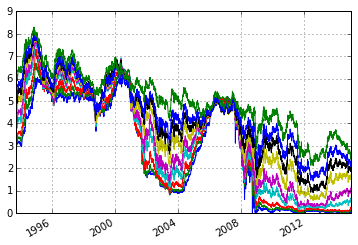

In [2]:
cmturl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/cmt.csv"
cmt_rates = pd.read_csv(cmturl, parse_dates=[0], index_col=[0])

cmt_rates.plot(legend=False);
tenors = cmt_rates.columns.map(float)
tenorTags = ['T=%g' % m for m in tenors]

##　Problem 2

Take the covariance matrix $V$ estimated from the CMT historical levels, compute the following:
1. its L-2 condition number
2. its singular values, and the ratio between the largest and smallest singular values
3. Comment on whether there could be troubled area when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, if so, give an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

In [3]:
V = cmt_rates.cov()

1.its L-2 condition number

In [4]:
np.linalg.cond(V,2)

74717.110966934881

2.its singular values, and the ratio between the largest and smallest singular values

In [5]:
u, s, v = np.linalg.svd(V)
print "Singular Values:"
print s
print "\n"
print "Ratio Between the Largest and Smallest Singular Values:"
print s[0]/s[-1]

Singular Values:
[  3.43312696e+01   1.23717917e+00   6.24601527e-02   1.67668300e-02
   7.38918224e-03   2.39507193e-03   1.50154976e-03   9.64149386e-04
   4.59483366e-04]


Ratio Between the Largest and Smallest Singular Values:
74717.1109669


3.There could be troubled area when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, and below is an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

In [6]:
V_plus = np.linalg.inv(V.T.dot(V)).dot(V.T)
a = 1/np.linalg.norm(V_plus,2)
b = np.linalg.norm(V,2)

V_inv = np.linalg.inv(V)
x = a*np.random.random(size = 9)
delta_x = b*np.random.random(size = 9)

y1 = V_inv.dot(x)
y2 = V_inv.dot(x + delta_x)

df = pd.DataFrame(np.array([y1, y2, y2-y1]), index=['Original y', 'y with small perturbations','Diff in y for small perturbations'])
fmt.displayDF(df, "4g")

,0,1,2,3,4,5,6,7,8
Original y,0.01003,-0.03443,0.03225,0.02405,-0.06142,0.04177,-0.0009255,-0.009316,-0.002864
y with small perturbations,5.462,"3,363","-4,619","-5,074",1.187e+04,"-7,381","-2,278","5,923","-1,570"
Diff in y for small perturbations,5.452,"3,363","-4,619","-5,074",1.187e+04,"-7,381","-2,278","5,923","-1,570"


## Problem 3

From the interest rate historical data, 
1. estimate the covariance of the daily interest rate **changes**
2. run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. Note that the correlation matrix can be viewed as the covariance matrix with the normalized risk factors. Make sure you take the normalization into account when comparing the eigenvectors. Try to find a clear way to illustrate their equivalence of the eigen vectors or the lack of.
3. from your results, how many principal components are required to explain 95% of the variance of rate changes? 
4. Plot these principal components of the covariance matrix that account for 95% of the variance and try to give economic explanations of what mode of rates changes they represent.
4. plot the history of PCA scores, i.e., the factor loading to the first 3 principal components, of the historical data.
4. write a program to simulate the daily interest rate **changes** up to the future time of 20Y using the first few principal components of the **changes** that accounted for 95% of the variance. From your simulated IR change paths, re-estimate the covariance matrix of the **changes**, then comapre it to the original covariance matrix estimated from historical data. (think of a suitable metric for the comparison). You can assume that the daily rates changes are independent normals, and there are 250 business days per year. 
5. obtain the IR **levels** from the simulated paths of changes in step #4, and compute the following statistical metrics of the IR **level** distributions: mean, standard deviation, 2% and 98% quantiles. Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates. Make any reasonable assumptions on the starting interest rate term structure. 
6. [extra credit] Compute the 2% and 98% quantile of the historical 1Y and 10Y rate levels, and comment on if the simulated levels from the previous step matches the historical quantiles.
6. [extra credit] Comment on what could be done to make the simulated IR term structure more realistic. And which is a more suitable choice, PCA on IR levels or changes? Does your answer depend on your application?

Hints:
* numpy has a build in random number generator package, numpy.random. 
* cumsum, percentile are useful functions from numpy, you can use them to simplify your code
* for step 4, since the principal components are orthogonal, you can simply drive the change simulation using independent normal random numbers. Don't forget to take into account the eigen values in your simulation, i.e., the eigen values are the variance along the direction of the principal components. 
* for step 5, the levels are the sum of the changes, numpy.cumsum is a useful function to compute cumulative sums.

1.estimate the covariance of the daily interest rate changes

In [7]:
ir_changes = cmt_rates.diff()[1:]
Cov = ir_changes.cov()
Cov

,0.25,0.5,1,2,3,5,7,10,20
0.25,0.002831,0.001794,0.001446,0.001216,0.001179,0.001067,0.0009272,0.0007968,0.0005862
0.5,0.001794,0.001924,0.00165,0.001576,0.001564,0.001465,0.001319,0.001165,0.0009112
1,0.001446,0.00165,0.00208,0.002207,0.002228,0.002143,0.001974,0.001761,0.001419
2,0.001216,0.001576,0.002207,0.003297,0.003341,0.003314,0.003114,0.002794,0.002281
3,0.001179,0.001564,0.002228,0.003341,0.003705,0.003706,0.003534,0.003204,0.002661
5,0.001067,0.001465,0.002143,0.003314,0.003706,0.004107,0.003987,0.003675,0.003143
7,0.0009272,0.001319,0.001974,0.003114,0.003534,0.003987,0.004133,0.00381,0.003352
10,0.0007968,0.001165,0.001761,0.002794,0.003204,0.003675,0.00381,0.003709,0.003281
20,0.0005862,0.0009112,0.001419,0.002281,0.002661,0.003143,0.003352,0.003281,0.0032


2.run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. 
* The covariance and correlation PCA do give equivalent principal components. 
* If they give equivalent principal components, for each principal component, the ratio between the two eigen vectors should be same on every tenors. 
* We can see from the plot that, for the first principal component, they are nearly equivalent. However, for the next two PC, they are not equivalent.

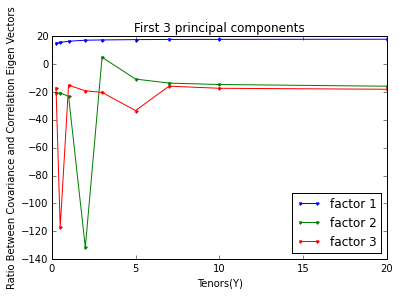

In [8]:
Cor = ir_changes.corr()

x_Cov, v_Cov = np.linalg.eig(Cov)
x_Cor, v_Cor = np.linalg.eig(Cor)

#take the normalization into account 
RiskFactor = np.sqrt(np.var(ir_changes))
v_Cor2 = np.array([x*RiskFactor for x in v_Cor.T]).T

#plot the first three principal components
flab = ['factor %d' % i for i in range(1, 4)]
plot(tenors, v_Cov[:, :3]/v_Cor2[:, :3], '.-')
xlabel('Tenors(Y)')
ylabel('Ratio Between Covariance and Correlation Eigen Vectors')
legend(flab, loc='best')
title('First 3 principal components')

3.From the results, 3 principal components are required to explain 95% of the variance of rate changes. (Explained by both the covariance and correlation)

In [9]:
#Explained by the covariance
pct_v = np.cumsum(x_Cov)/sum(x_Cov)*100

pd.set_option('display.precision', 3)
fmt.displayDF(pd.DataFrame({'P/C':range(1, len(x_Cov)+1), 'Eigenvalues':x_Cov, 'Cumulative Var(%)': pct_v}).set_index(['P/C']).T, "2f")

P/C,1,2,3,4,5,6,7,8,9
Cumulative Var(%),77.57,91.40,95.85,97.60,98.43,99.05,99.45,99.71,100.00
Eigenvalues,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
#Explained by the correlation
pct_v2 = np.cumsum(x_Cor)/sum(x_Cor)*100

pd.set_option('display.precision', 3)
fmt.displayDF(pd.DataFrame({'P/C':range(1, len(x_Cor)+1), 'Eigenvalues':x_Cor, 'Cumulative Var(%)': pct_v2}).set_index(['P/C']).T, "2f")

P/C,1,2,3,4,5,6,7,8,9
Cumulative Var(%),73.55,90.55,95.18,97.41,98.55,99.18,99.39,99.64,100.00
Eigenvalues,6.62,1.53,0.42,0.20,0.10,0.06,0.02,0.02,0.03


4.Plot these principal components of the covariance matrix that account for 95% of the variance.
* The first factor is curvature. The main effects of the shock focus on medium-term interest rates, and consequently the yield curve becomes more “hump-shaped” than before.
* The second factor is slope. The shock to the “slope” factor increases short-term interest rates by much larger amounts than the long-term interest rates, so that the yield curve becomes less steep and its slope decreases. 
* The third factor is level. A “level” shock changes the interest rates of all maturities by almost identical amounts, inducing a parallel shift that changes the level of the whole yield curve.

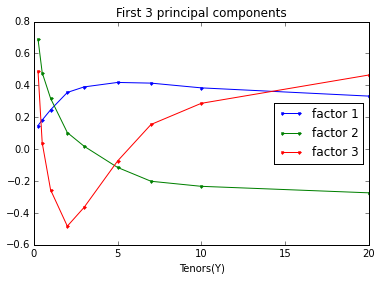

In [11]:
flab = ['factor %d' % i for i in range(1, 4)]
plot(tenors, v_Cov[:, :3], '.-')
xlabel('Tenors(Y)')
legend(flab, loc='best')
title('First 3 principal components')

5.plot the history of PCA scores, i.e., the factor loading to the first 3 principal components, of the historical data.

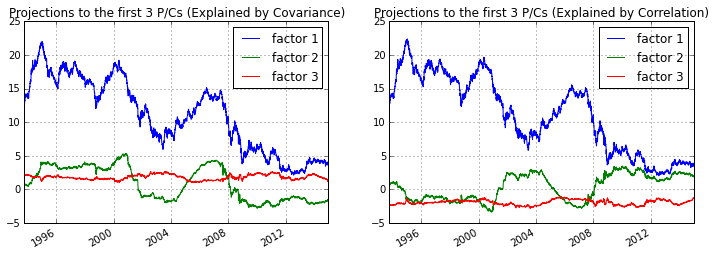

In [12]:
flab = ['factor %d' % i for i in range(1, 4)]
fig = figure(figsize=[12, 4])
ax1 = fig.add_subplot(121)
fs = cmt_rates.dot(v_Cov).iloc[:, :3]
fs.plot(ax=ax1, title='Projections to the first 3 P/Cs (Explained by Covariance)')
legend(flab, loc='best')

ax2 = fig.add_subplot(122)
fs2 = cmt_rates.dot(v_Cor).iloc[:, :3]
fs2.plot(ax=ax2, title='Projections to the first 3 P/Cs (Explained by Correlation)')
legend(flab, loc='best')

6.write a program to simulate the daily interest rate changes.

In [13]:
#First three principal components of the changes, which also are independent normals
simulate3 = np.random.normal(size = [1000,250*20,3])

#take into account the eigen values in the simulation, 
#i.e., the eigen values are the variance along the direction of the principal components.
e = np.sqrt(x_Cov[:3])
pc = np.array([x*y for x, y in zip(v_Cov[:,:3].T, e)]).T

#Simulate all 9 tenors by the first three principal components
simulate9 = np.array([[pc.dot(x) for x in y] for y in simulate3])

From your simulated IR change paths, re-estimate the covariance matrix of the changes.

In [14]:
sim_Cov = pd.DataFrame(np.cov(np.vstack(simulate9).T), index=tenors, columns=tenors)
fmt.displayDFs(sim_Cov)

,0.25,0.5,1.0,2.0,3.0,5.0,7.0,10.0,20.0
0.25,0.002703,0.001955,0.001539,0.001166,0.001119,0.001029,0.0009193,0.0008164,0.0006441
0.5,0.001955,0.001671,0.001611,0.001635,0.001618,0.001493,0.001321,0.001145,0.0008636
1,0.001539,0.001611,0.001858,0.002264,0.002308,0.002198,0.001988,0.001739,0.001343
2,0.001166,0.001635,0.002264,0.003188,0.003356,0.003344,0.003131,0.002798,0.002258
3,0.001119,0.001618,0.002308,0.003356,0.003598,0.003698,0.003546,0.00322,0.002681
5,0.001029,0.001493,0.002198,0.003344,0.003698,0.003996,0.003973,0.003696,0.003212
7,0.0009193,0.001321,0.001988,0.003131,0.003546,0.003973,0.00405,0.003825,0.003413
10,0.0008164,0.001145,0.001739,0.002798,0.00322,0.003696,0.003825,0.003647,0.003305
20,0.0006441,0.0008636,0.001343,0.002258,0.002681,0.003212,0.003413,0.003305,0.00307


Then comapre it to the original covariance matrix estimated from historical data
* Distance =|(fnorm(A)−fnorm(B))|,where fnorm = sq root of sum of squares of all singular values.
* Ratio = Distance/|fnorm(A)|

In [15]:
Distance = abs(np.linalg.norm(Cov,1)-np.linalg.norm(sim_Cov,1))
print "Distance between two covariance matrix %f" %Distance

Distance between two covariance matrix 0.000032


In [16]:
Ratio = Distance/np.linalg.norm(Cov,1)
print "Ratio of diffrence from the orginal covariance matrix by historical data to the new covariance matrix by simulated data: %f" % Ratio

Ratio of diffrence from the orginal covariance matrix by historical data to the new covariance matrix by simulated data: 0.001212


7.obtain the IR levels from the simulated paths of changes in step 6, and compute the following statistical metrics of the IR level distributions: mean, standard deviation, 2% and 98% quantiles.

In [17]:
mean(mean(cmt_rates))

3.7090894561435053

Summing up the simulated daily IR changes with the initial IR level to obtain the daily IR levels.

In [18]:
# Initialized the IR level as 3.71%, based on the mean of all the ir for all the tenors.
ir_levels = np.cumsum(simulate9, 1) + 3.71

mean = np.mean(ir_levels, 0)
std = np.std(ir_levels, 0)
quantile2 = np.percentile(ir_levels, 2, axis=0)
quantile98 = np.percentile(ir_levels, 98, axis=0)

Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates.

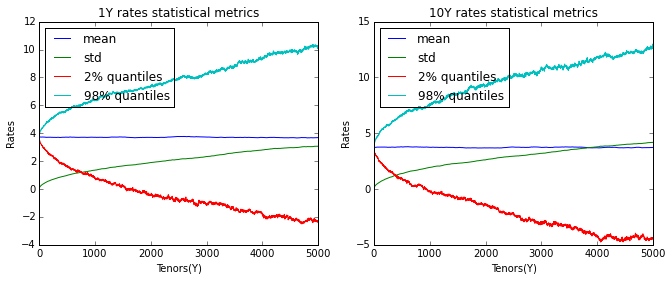

In [19]:
figure(figsize=[11, 4])

#1Y term rates
subplot(1, 2, 1)
plot(mean[:,2])
plot(std[:,2])
plot(quantile2[:,2])
plot(quantile98[:,2])
legend(['mean', 'std', '2% quantiles', '98% quantiles'], loc='best')
title('1Y rates statistical metrics')
ylabel('Rates')
xlabel('Tenors(Y)')

#10Y term rates
subplot(1, 2, 2)
plot(mean[:,7])
plot(std[:,7])
plot(quantile2[:,7])
plot(quantile98[:,7])
legend(['mean', 'std', '2% quantiles', '98% quantiles'], loc='best')
title('10Y rates statistical metrics')
ylabel('Rates')
xlabel('Tenors(Y)')